In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix


In [98]:
def plot_confusion(confusion_mat):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.rainbow)
    plt.title("Confusion Matrix")
    plt.colorbar()
    ticks_marks = np.arange(4)
    plt.xticks(ticks_marks, ticks_marks)
    plt.yticks(ticks_marks, ticks_marks)
    plt.ylabel("True Labels")
    plt.xlabel("Predicted Labels")
    plt.grid(True)
    plt.show();

In [99]:
y_true = [1,0,0,2,1,1,3,2,3]
y_pred = [1,0,0,2,1,0,3,2,2]

In [100]:
confusion = confusion_matrix(y_true, y_pred)

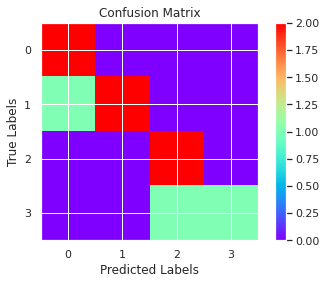

In [101]:
plot_confusion(confusion)

In [102]:
from sklearn.metrics import classification_report
target_names = ["Class-0", "Class-1", "Class-2", "Class-3"]

print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class-0       0.67      1.00      0.80         2
     Class-1       1.00      0.67      0.80         3
     Class-2       0.67      1.00      0.80         2
     Class-3       1.00      0.50      0.67         2

    accuracy                           0.78         9
   macro avg       0.83      0.79      0.77         9
weighted avg       0.85      0.78      0.77         9



In [103]:
from sklearn.linear_model import LogisticRegression

#input features 
X = np.array([[4.0,7.0], 
                 [3.5,5.0], 
                 [3.1,6.2], 
                 [0.5,1.0],
                 [1.0,2.0], 
                 [1.2,1.9], 
                 [6.0,2.0], 
                 [5.7,1.5],
                 [5.4,2.2]])

# input labels
y = np.array([0,
              0,
              0,
              1,
              1,
              1,
              2,
              2,
              2])



In [104]:
classifier = LogisticRegression(solver = 'lbfgs', C = 100)
classifier.fit(X,y)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
x_min, x_max = min(X[:,0]) - 1.0, max(X[:,0]) + 1.0
y_min, y_max = min(X[:,1]) - 1.0, max(X[:,1]) + 1.0

step_size = 0.01

x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), 
                               np.arange(y_min, y_max, step_size))

mesh_out = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

In [106]:
mesh_out = mesh_out.reshape(x_values.shape)

<ipython-input-107-5587b2b29086>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_out, cmap = plt.cm.autumn_r)


(0.0, 7.99)

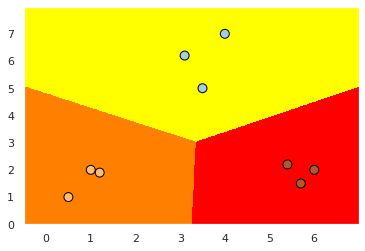

In [107]:
plt.figure()
plt.pcolormesh(x_values, y_values, mesh_out, cmap = plt.cm.autumn_r)
plt.scatter(X[:,0], X[:,1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())

In [108]:
from sklearn.model_selection import train_test_split
import pandas as pd

titanic1 = pd.read_csv('data/titanictrain.csv')
titanic2 = pd.read_csv('data/titanictest.csv')
titanic = pd.concat([titanic1, titanic2])

titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
titanic.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [110]:
port = pd.get_dummies(titanic.Embarked, prefix="Embarked")
port.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [111]:
titanic = titanic.join(port)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,male,22.0,1,0,7.2500,S,0,0,1
0,0.0,3,male,22.0,1,0,7.2500,S,0,1,0
0,NaN,3,male,34.5,0,0,7.8292,Q,0,0,1
0,NaN,3,male,34.5,0,0,7.8292,Q,0,1,0
1,1.0,1,female,38.0,1,0,71.2833,C,1,0,0


In [112]:
titanic.drop(['Embarked'], axis=1, inplace=True)
titanic.Sex = titanic.Sex.map({'male':0, 'female':1})

In [113]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,22.0,1,0,7.2500,0,0,1
0,0.0,3,0,22.0,1,0,7.2500,0,1,0
0,NaN,3,0,34.5,0,0,7.8292,0,0,1
0,NaN,3,0,34.5,0,0,7.8292,0,1,0
1,1.0,1,1,38.0,1,0,71.2833,1,0,0


In [114]:
titanic[pd.isnull(titanic).any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,NaN,3,0,34.5,0,0,7.8292,0,0,1
0,NaN,3,0,34.5,0,0,7.8292,0,1,0
1,NaN,3,1,47.0,1,0,7.0000,1,0,0
1,NaN,3,1,47.0,1,0,7.0000,0,0,1
2,NaN,2,0,62.0,0,0,9.6875,0,0,1
...,...,...,...,...,...,...,...,...,...,...
859,0.0,3,0,NaN,0,0,7.2292,1,0,0
863,0.0,3,1,NaN,8,2,69.5500,0,0,1
868,0.0,3,0,NaN,0,0,9.5000,0,0,1
878,0.0,3,0,NaN,0,0,7.8958,0,0,1


In [115]:
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,22.0,1,0,7.2500,0,0,1
0,0.0,3,0,22.0,1,0,7.2500,0,1,0
0,NaN,3,0,34.5,0,0,7.8292,0,0,1
0,NaN,3,0,34.5,0,0,7.8292,0,1,0
1,1.0,1,1,38.0,1,0,71.2833,1,0,0


In [116]:
titanic.dropna(inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,22.0,1,0,7.2500,0,0,1
0,0.0,3,0,22.0,1,0,7.2500,0,1,0
1,1.0,1,1,38.0,1,0,71.2833,1,0,0
1,1.0,1,1,38.0,1,0,71.2833,0,0,1
2,1.0,3,1,26.0,0,0,7.9250,0,0,1


In [117]:
y = titanic.Survived.copy()
X = titanic.drop(["Survived"], axis=1)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [119]:
lreg = LogisticRegression(solver='liblinear')
lreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
y_pred = pd.Series(lreg.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ["Actual", "Predicted"]
z.head()

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [124]:
def plot_confusion2(confusion_mat):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.rainbow)
    plt.title("Confusion Matrix")
    plt.colorbar()
    ticks_marks = np.arange(2)
    plt.xticks(ticks_marks, ticks_marks)
    plt.yticks(ticks_marks, ticks_marks)
    plt.ylabel("True Labels")
    plt.xlabel("Predicted Labels")
    plt.grid(True)
    plt.show();

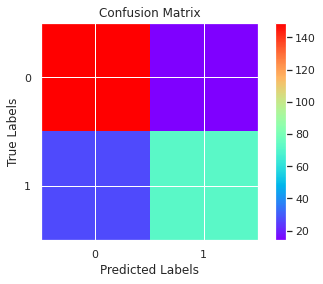

In [125]:
conf = confusion_matrix(y_test, y_pred)
plot_confusion2(conf)